## Preface

본 과제를 위해 제공된 데이터를 외부인에게 절대 공개하지마세요.


![day6.jpg](day6.jpg)

### 기억력 (total_recall) from full_dataset.csv

In [93]:
import json
import numpy as np
# Checkif pandas is installed
try:
    import pandas 
except ImportError:
    # Run pip install pandas
    import pip
    pip.main(['install', 'pandas'])
    import pandas 
try:
    import matplotlib.pyplot as plt
except ImportError:
    # Run pip install matplotlib
    import pip
    pip.main(['install', 'matplotlib'])
    import matplotlib.pyplot as plt


# Read data from full_dataset.csv
df = pandas.read_csv('full_dataset.csv')
print("==========================================")
print("not removed")
print(df)

# Remove duplicates by "subno"
removed = df.drop_duplicates(subset='sub_no', keep='first')
print("==========================================")
print("removed duplicates by subno")
print(removed)

# Remove original_sent, recall_sent, recall_sent_num columns 
removed_columns = removed.drop(['original_sent', 'recall_sent', 'recall_sent_num', ], axis=1)
print("==========================================")
print("removed columns original_sent, recall_sent, recall_sent_num")
print(removed_columns)

# We can analyze the data by multiple factors such as,
# 1. age_group VS. total recall
# 2. age_group VS. depression score
# 3. age_group VS. speed task
# 4. age_group VS. total recall VS. depression score
# 5. age_group VS. total recall VS. speed task
# 6. age_group VS. depression score VS. speed task
# 7. age_group VS. total recall VS. depression score VS. speed task



not removed
      sub_no  set_no  orig_sent_num  \
0        102       1            2.0   
1        102       1            3.0   
2        102       1            4.0   
3        102       1            5.0   
4        102       1            6.0   
...      ...     ...            ...   
2635     999       2           21.0   
2636     999       2           22.0   
2637     999       2           23.0   
2638     999       2           24.0   
2639     999       2           25.0   

                                          original_sent  recall_sent_num  \
0     이빨이 뾰족하지 않은 어떤 초식 공룡은 나뭇잎과 풀을 소화시키기 위해 돌을 먹이와 ...               13   
1     옛날 우리 조상들은 마을 근처에 인위적으로 숲을 조성하여 풍해와 수해를 예방하고 외...               14   
2     매일 아침 발리의 주부들은 악귀를 몰아내기 위해 바나나 잎 조각 위에 밥을 조금 올...                2   
3     허스키 종류의 개는 털이 이중으로 나는데 특히 부드럽고 짧은 안쪽 털은 추위로부터 ...               12   
4     대부분의 터키 행상인들은 낡고 오래된 버스를 타고 다니며 대도시로 여행하기 위해 자...                4   
...                                                 ...        

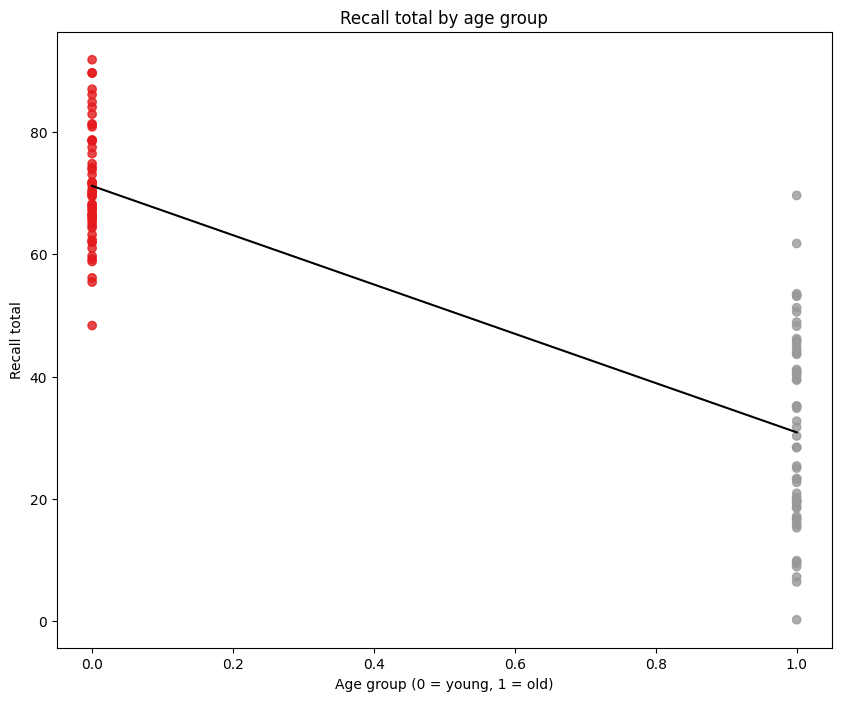

In [94]:

# We can analyze the data by multiple factors such as,
# 1. age_group VS. total recall
# 2. age_group VS. depression score
# 3. age_group VS. speed task
# 4. age_group VS. total recall VS. depression score
# 5. age_group VS. total recall VS. speed task
# 6. age_group VS. depression score VS. speed task
# 7. age_group VS. total recall VS. depression score VS. speed task

# First we will analyze the data by age_group VS. total recall
# We will use a scatter plot to visualize the data
# We will also add a regression line to the plot
plt.figure(figsize=(10, 8))
plt.scatter(removed_columns['age_group_clf'], removed_columns['recall_total'], c=removed_columns['age_group_clf'], cmap='Set1', alpha=0.8)
x = removed_columns['age_group_clf']
y = removed_columns['recall_total']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, c='k')
plt.xlabel('Age group (0 = young, 1 = old)')
plt.ylabel('Recall total')
plt.title('Recall total by age group')
plt.show()



### QA-2 우울률 비교 그래프 from full_dataset.csv

Plot 의 종류

- Line plot
- Scatter plot
- Bar plot
- Histogram
- Heatmap
- Violin plot
- Area plot
- Pie chart
- Bubble plot
- Treemap

In [95]:


# Ok let's compare young and old people's depression scores

# cesd_boston is the depression score

# First, let's get the depression scores for young people
young = removed_columns[removed_columns['age_group_clf'] == 0]
young_depression = young['cesd_boston']
print('Young people depression scores: ', young_depression)

# Now let's get the depression scores for old people
old = removed_columns[removed_columns['age_group_clf'] == 1]
old_depression = old['cesd_boston']
# print('Old people depression scores: ', old_depression)

# Now let's compare the two groups
# We'll use a t-test to compare the two groups

try:
    from scipy.stats import ttest_ind
except ImportError:
    # Run pip install scipy
    import pip
    pip.main(['install', 'scipy'])
    from scipy.stats import ttest_ind

ttest_ind(young_depression, old_depression)

# Ttest_indResult(statistic=2.784097012003856, pvalue=0.006339067598765612)

# The p-value is less than 0.05, so we can reject the null hypothesis
# That means that the depression scores are different between young and old people

# The test statistic is 2.784 and the p-value is 0.0063. 
# The test statistic represents the calculated t-value for the test, 
# which measures the difference between the means of the two groups relative to the variability within each group. 
# The p-value represents the probability of observing a test statistic as extreme as the one calculated, assuming that the null hypothesis is true.

# In this case, with a p-value of 0.0063, we can reject the null hypothesis that 
# there is no difference between the means of the two groups at a significance level of 0.05 
# (assuming a two-tailed test). This suggests that there may be a significant difference in depression 
# scores between young and old participants. 
# However, it's important to note that the results of a hypothesis test should always be interpreted in context and with caution, 
# as there may be other factors at play that are not accounted for in the analysis.


Young people depression scores:  0       3
24      4
48      1
72      7
96      1
120     0
144     0
168     1
192     3
216     3
240     1
264     0
288     1
312     0
336     1
360     0
384     1
408     5
432     1
456     1
480     1
504     4
528     1
552     0
576     0
600     3
624     3
648     1
672     7
696     2
720     0
744     4
768     2
792     1
816     1
840     0
864     4
888     5
912     2
936     4
960     4
984     1
1008    1
1032    1
1056    3
1080    6
1104    2
1128    6
1152    2
1176    2
1200    1
1224    2
1248    6
1272    1
Name: cesd_boston, dtype: int64


Ttest_indResult(statistic=2.784097012003856, pvalue=0.006339067598765612)

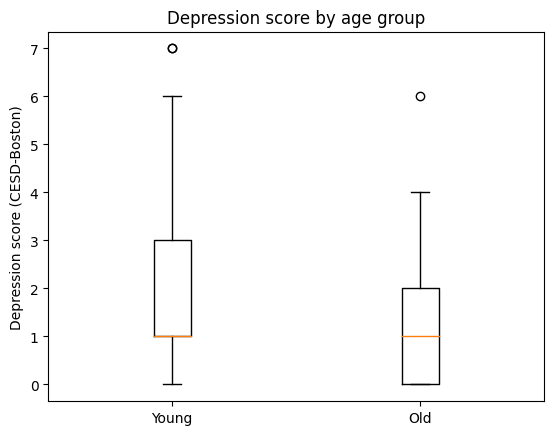

In [96]:
# Plot use cases that we can use to visualize data
# reference: https://www.data-to-viz.com/
# Scatter plot
# Line plot
# Bar plot
# Histogram
# Heatmap
# Violin plot
# Area plot
# Pie chart
# Bubble plot
# Treemap

# box plots
plt.boxplot([young_depression, old_depression], labels=['Young', 'Old'])
plt.ylabel('Depression score (CESD-Boston)')
plt.title('Depression score by age group')
plt.show()


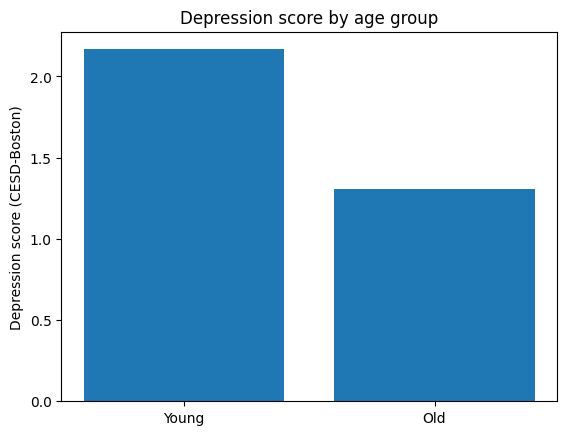

In [97]:
# Plot use cases that we can use to visualize data
# reference: https://www.data-to-viz.com/
# Scatter plot
# Line plot
# Bar plot
# Histogram
# Heatmap
# Violin plot
# Area plot
# Pie chart
# Bubble plot
# Treemap

# bar charts
plt.bar(['Young', 'Old'], [young_depression.mean(), old_depression.mean()])
plt.ylabel('Depression score (CESD-Boston)')
plt.title('Depression score by age group')
plt.show()


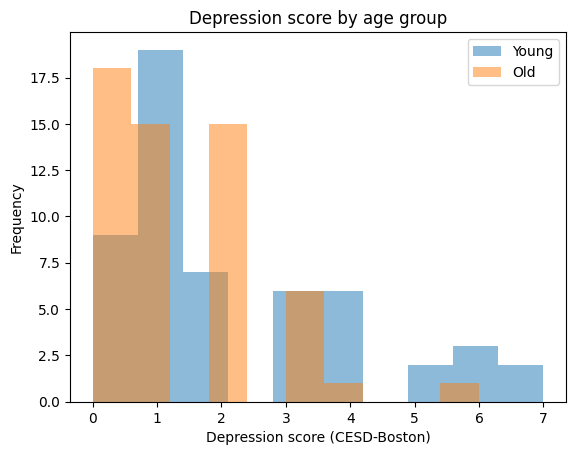

In [98]:
# Plot use cases that we can use to visualize data
# reference: https://www.data-to-viz.com/
# Scatter plot
# Line plot
# Bar plot
# Histogram
# Heatmap
# Violin plot
# Area plot
# Pie chart
# Bubble plot
# Treemap

# histograms
plt.hist(young_depression, alpha=0.5, label='Young')
plt.hist(old_depression, alpha=0.5, label='Old')
plt.legend(loc='upper right')
plt.xlabel('Depression score (CESD-Boston)')
plt.ylabel('Frequency')
plt.title('Depression score by age group')
plt.show()


                     sub_no    set_no  orig_sent_num  age_group_clf   sex_clf  \
sub_no             1.000000  0.099364            NaN       0.992182 -0.014543   
set_no             0.099364  1.000000            NaN       0.108519  0.086597   
orig_sent_num           NaN       NaN            NaN            NaN       NaN   
age_group_clf      0.992182  0.108519            NaN       1.000000 -0.002673   
sex_clf           -0.014543  0.086597            NaN      -0.002673  1.000000   
cesd_boston_clf   -0.282283  0.118082            NaN      -0.298671  0.129009   
edu_years         -0.351566 -0.015581            NaN      -0.327798 -0.284988   
recall_total      -0.839558 -0.202056            NaN      -0.839798 -0.092241   
mmse              -0.551963 -0.034098            NaN      -0.537730 -0.130979   
fab               -0.579907 -0.110318            NaN      -0.567218 -0.120099   
span_task         -0.590966 -0.047295            NaN      -0.596261 -0.046669   
speed_task        -0.845368 

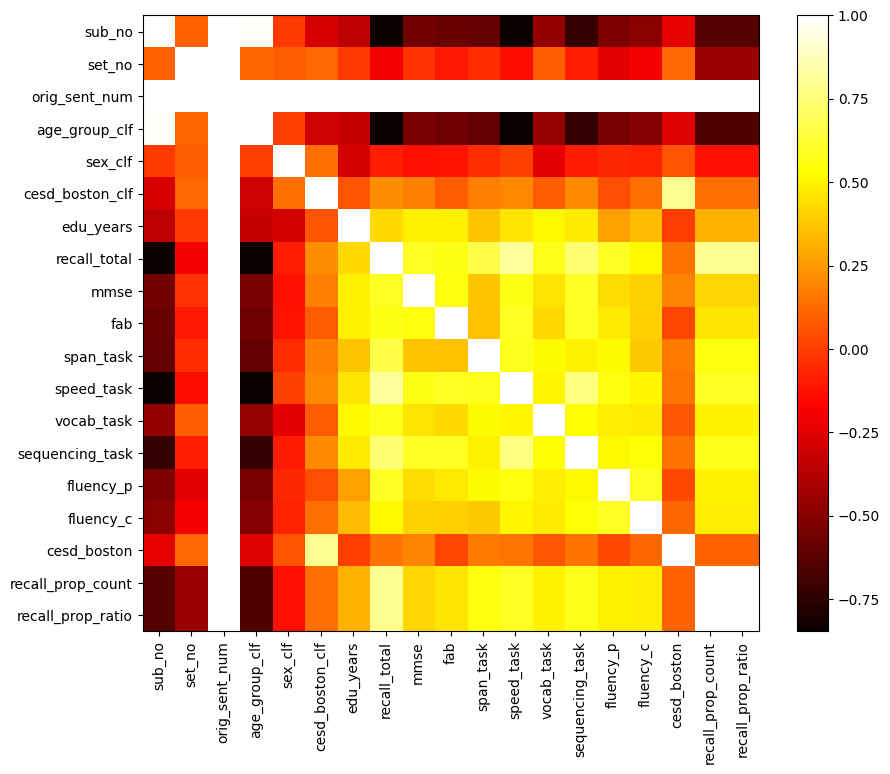

In [99]:
# Plot use cases that we can use to visualize data
# reference: https://www.data-to-viz.com/
# Scatter plot
# Line plot
# Bar plot
# Histogram
# Heatmap
# Violin plot
# Area plot
# Pie chart
# Bubble plot
# Treemap

# Heatmap
# Correlation matrix
# We can use a correlation matrix to see how different variables are correlated
# We can use a heatmap to visualize the correlation matrix
# We can use a correlation matrix to see how different variables are correlated
# We can use a heatmap to visualize the correlation matrix
corr = removed_columns.corr()
print(corr)
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns)
plt.show()



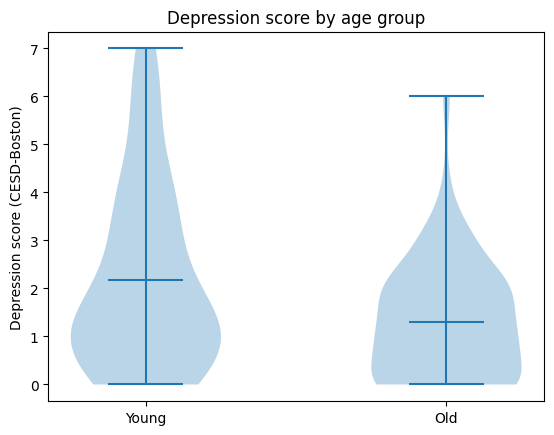

In [100]:
# Plot use cases that we can use to visualize data
# reference: https://www.data-to-viz.com/
# Scatter plot
# Line plot
# Bar plot
# Histogram
# Heatmap
# Violin plot
# Area plot
# Pie chart
# Bubble plot
# Treemap

# Violin plot
# We can use a violin plot to compare the distribution of depression scores between young and old people
plt.violinplot([young_depression, old_depression], showmeans=True)
plt.xticks([1, 2], ['Young', 'Old'])
plt.ylabel('Depression score (CESD-Boston)')
plt.title('Depression score by age group')
plt.show()


In [101]:

# Plot use cases that we can use to visualize data
# reference: https://www.data-to-viz.com/
# Scatter plot
# Line plot
# Bar plot
# Histogram
# Heatmap
# Violin plot
# Area plot
# Pie chart
# Bubble plot
# Treemap



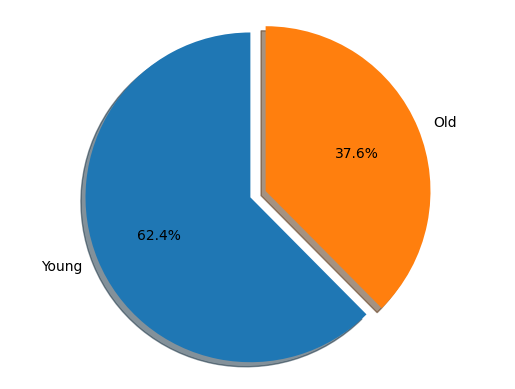

In [102]:
# Plot use cases that we can use to visualize data
# reference: https://www.data-to-viz.com/
# Scatter plot
# Line plot
# Bar plot
# Histogram
# Heatmap
# Violin plot
# Area plot
# Pie chart
# Bubble plot
# Treemap

# Pie chart
# We can use a pie chart to compare the distribution of depression scores between young and old people

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Young', 'Old'
sizes = [young_depression.mean(), old_depression.mean()]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


ValueError: x and y must be the same size

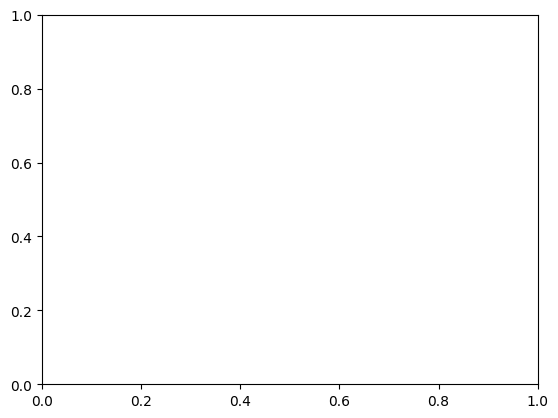

In [103]:
# Plot use cases that we can use to visualize data
# reference: https://www.data-to-viz.com/
# Scatter plot
# Line plot
# Bar plot
# Histogram
# Heatmap
# Violin plot
# Area plot
# Pie chart
# Bubble plot
# Treemap

# Bubble plot
# We can use a bubble plot to compare the distribution of depression scores between young and old people

plt.scatter(young_depression, old_depression, s=10)
# bubble size is 10
# s is the size of the bubble
plt.xlabel('Young depression score (CESD-Boston)')
plt.ylabel('Old depression score (CESD-Boston)')
plt.title('Depression score by age group')
plt.show()


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Defaulting to user installation because normal site-packages is not writeable

Collecting squarify

Downloading squarify-0.4.3-py3-none-any.whl (4.3 kB)

Installing collected packages: squarify

Successfully installed squarify-0.4.3

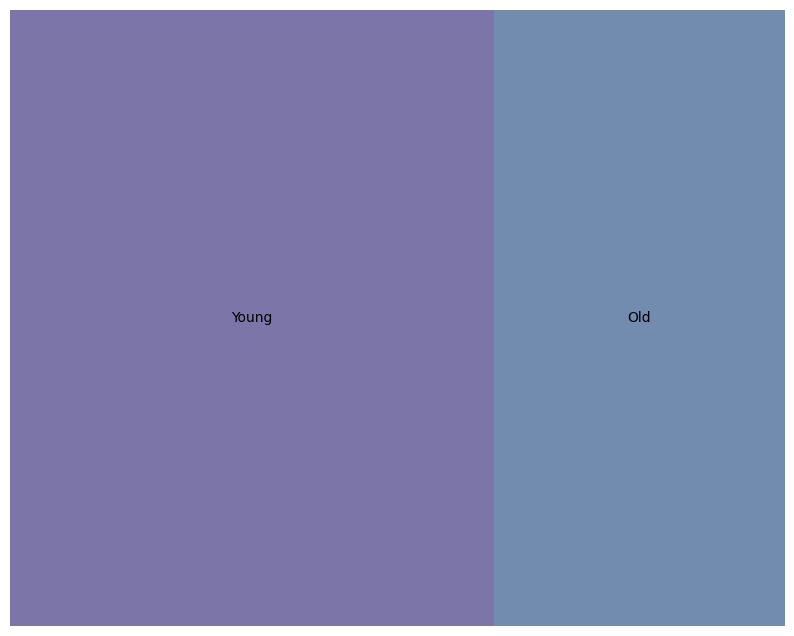

In [ ]:

# Plot use cases that we can use to visualize data
# reference: https://www.data-to-viz.com/
# Scatter plot
# Line plot
# Bar plot
# Histogram
# Heatmap
# Violin plot
# Area plot
# Pie chart
# Bubble plot
# Treemap

# Treemap
# We can use a treemap to compare the distribution of depression scores between young and old people
plt.figure(figsize=(10, 8))
try:
    import squarify
except ImportError:
    import pip
    pip.main(['install', 'squarify'])
    import squarify

squarify.plot(sizes=[young_depression.mean(), old_depression.mean()], label=['Young', 'Old'], alpha=.7 )
plt.axis('off')
plt.show()



### Plot 기억력 비교 from 1_demo_update.xlsx

In [ ]:
# Ok, let's compare young and old people's recall scores from 1_demo_update.xlsx file

# Read data from 1_demo_update.xlsx
df2 = pandas.read_excel('1_demo_update.xlsx')


# print(df2)


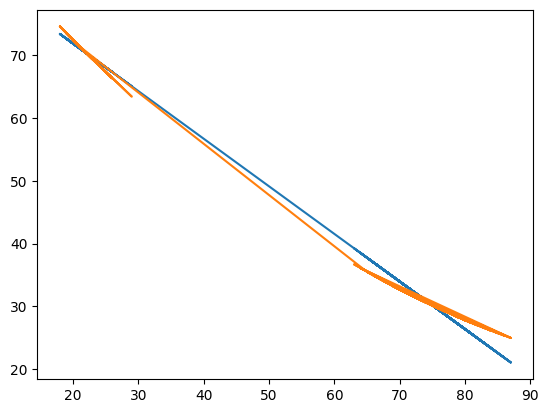

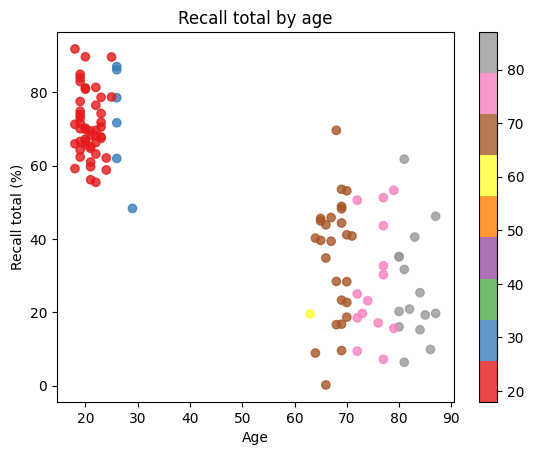

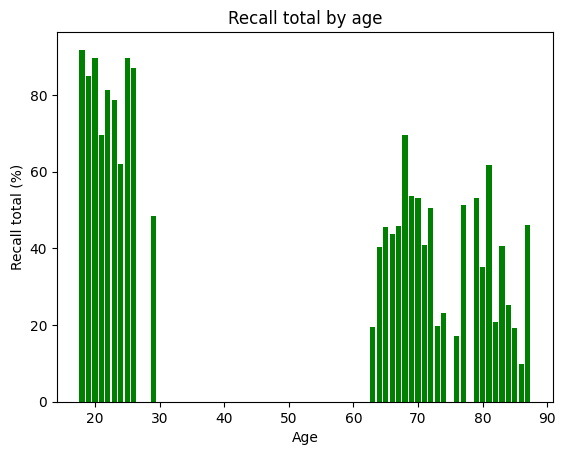

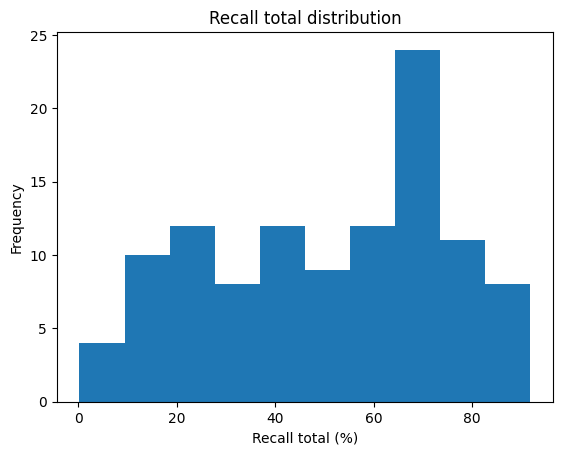

                    subno  recall_total(%)       sex       age  edu(years)  \
subno            1.000000        -0.839562 -0.014543  0.976395   -0.351566   
recall_total(%) -0.839562         1.000000 -0.092247 -0.839211    0.424468   
sex             -0.014543        -0.092247  1.000000 -0.037514   -0.284988   
age              0.976395        -0.839211 -0.037514  1.000000   -0.336199   
edu(years)      -0.351566         0.424468 -0.284988 -0.336199    1.000000   
MMSE            -0.551963         0.588975 -0.130979 -0.519496    0.490620   
FAB             -0.579907         0.570692 -0.120099 -0.583070    0.491320   
span task       -0.590966         0.665853 -0.046669 -0.603564    0.371835   
기호쓰기            -0.845368         0.818611  0.010428 -0.871871    0.460315   
어휘              -0.466524         0.579879 -0.241284 -0.445466    0.511569   
순서화             -0.718622         0.738694 -0.100614 -0.728187    0.474838   
음소유창성           -0.526246         0.602907 -0.067452 -0.561329  

/home/jayleekr/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jayleekr/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jayleekr/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50416 (\N{HANGUL SYLLABLE SSEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jayleekr/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jayleekr/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 55064 (\N{HANGUL SYLLABLE HWI}) missing from current font.
  fig.canvas.print_figure(byt

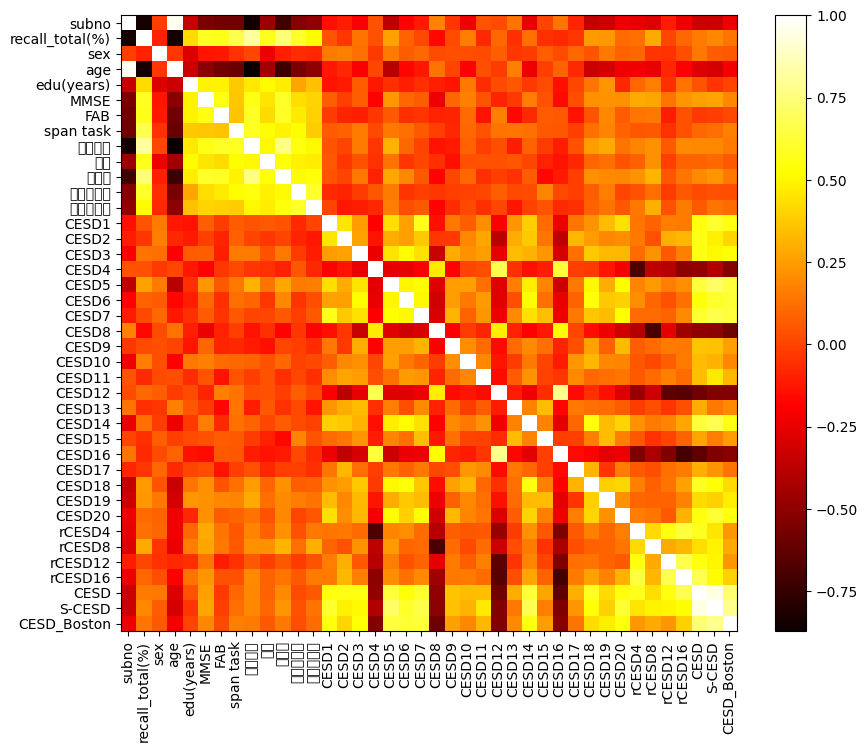

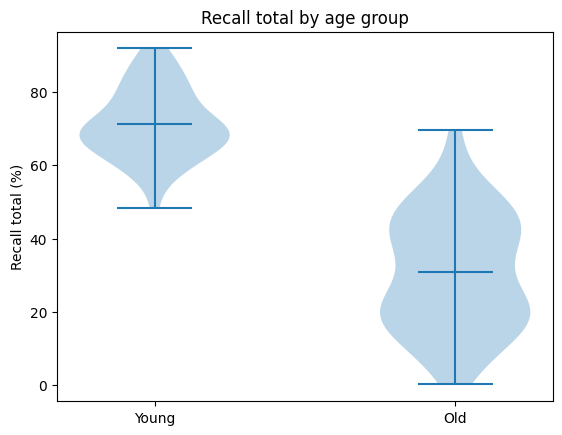

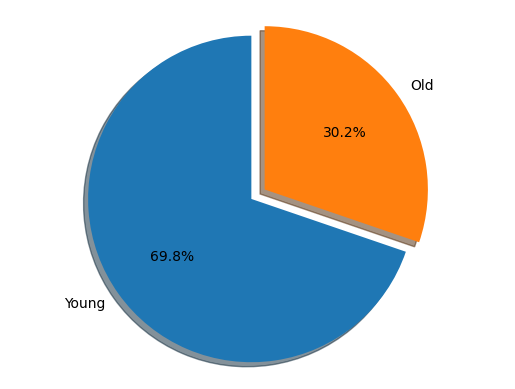

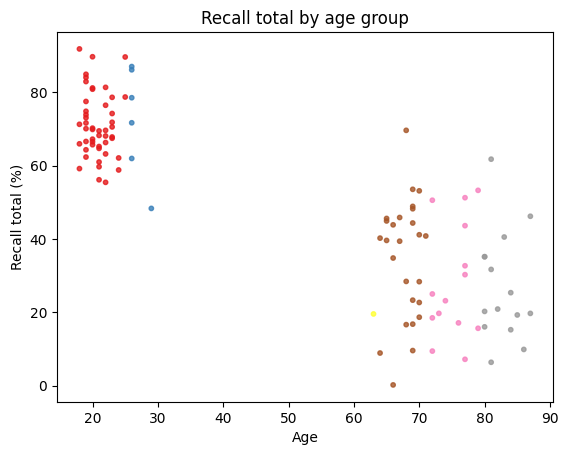

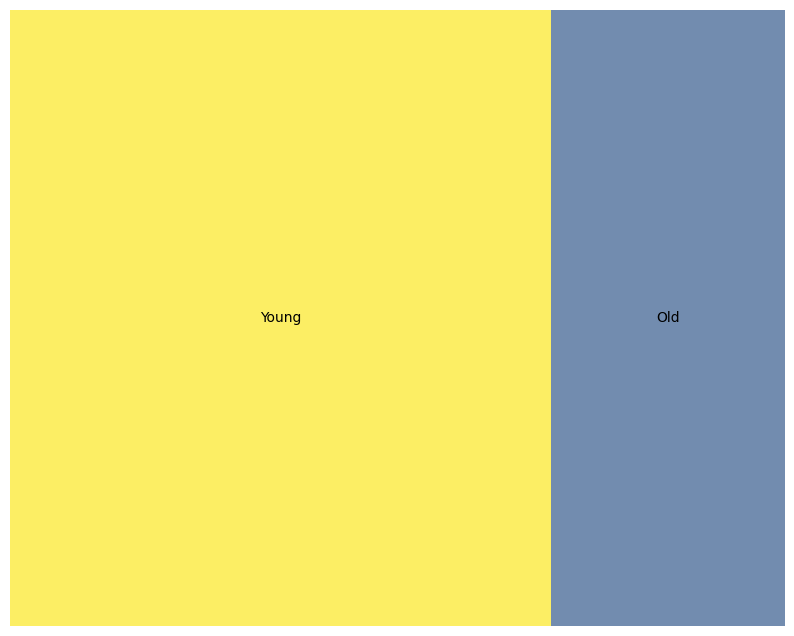

In [ ]:
# Plot use cases that we can use to visualize data
# reference: https://www.data-to-viz.com/
# Scatter plot
# Line plot
# Bar plot
# Histogram
# Heatmap
# Violin plot
# Area plot
# Pie chart
# Bubble plot
# Treemap


# age -> age
# recall_total -> recall_total(%)
x = df2['age']
y = df2['recall_total(%)']

# Line plot
m, b = np.polyfit(x, y, 1)
# Fit a quadratic regression line
p = np.polyfit(x, y, 2)
y_fit = p[0]*x**2 + p[1]*x + p[2]

plt.plot(x, m*x + b)
plt.plot(x, y_fit)
plt.show()


# scatter plot
plt.scatter(df2['age'], df2['recall_total(%)'], c=df2['age'], cmap='Set1', alpha=0.8,
            label='recall_total(%)')
plt.colorbar()

plt.xlabel('Age')
plt.ylabel('Recall total (%)')
plt.title('Recall total by age')
plt.show()

# Bar plot
plt.bar(df2['age'], df2['recall_total(%)'], color='green')
plt.xlabel('Age')
plt.ylabel('Recall total (%)')
plt.title('Recall total by age')
plt.show()

# Histogram
plt.hist(df2['recall_total(%)'], bins=10)
# bins is the number of bins
plt.xlabel('Recall total (%)')
plt.ylabel('Frequency')
plt.title('Recall total distribution')
plt.show()

# Heatmap
# Correlation matrix
# We can use a correlation matrix to see how different variables are correlated
# We can use a heatmap to visualize the correlation matrix
# We can use a correlation matrix to see how different variables are correlated
# We can use a heatmap to visualize the correlation matrix
corr = df2.corr()
print(corr)

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns)
plt.show()

# Violin plot
# df2['age'] -> age
# df2['recall_total(%)'] -> recall_total(%)
plt.violinplot([df2['recall_total(%)'][df2['age'] < 40 ], df2['recall_total(%)'][df2['age'] >= 30]], showmeans=True)
plt.xticks([1, 2], ['Young', 'Old'])
plt.ylabel('Recall total (%)')
plt.title('Recall total by age group')
plt.show()

# Pie chart
# df2['age'] -> age
# df2['recall_total(%)'] -> recall_total(%)
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Young', 'Old'
sizes = [df2['recall_total(%)'][df2['age'] < 40 ].mean(), df2['recall_total(%)'][df2['age'] >= 30].mean()]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Bubble plot
# df2['age'] -> age
# df2['recall_total(%)'] -> recall_total(%)
plt.scatter(df2['age'], df2['recall_total(%)'], s=10, c=df2['age'], cmap='Set1', alpha=0.8,)
# bubble size is 10
# s is the size of the bubble
plt.xlabel('Age')
plt.ylabel('Recall total (%)')
plt.title('Recall total by age group')
plt.show()

# Treemap
# df2['age'] -> age
# df2['recall_total(%)'] -> recall_total(%)
plt.figure(figsize=(10, 8))
try:
    import squarify
except ImportError:
    import pip
    pip.main(['install', 'squarify'])
    import squarify

squarify.plot(sizes=[df2['recall_total(%)'][df2['age'] < 40 ].mean(), df2['recall_total(%)'][df2['age'] >= 30].mean()], label=['Young', 'Old'], alpha=.7 )
plt.axis('off')
plt.show()





# HW-#7!!!!!

우울률 비교 from 1_demo_update.xlsx

각종 plot으로 만들어보세요 ~